# Tunisia: Tourism Contribution to GDP per Capita

In this report, we explore how tourism activity influences GDP per capita in Tunisia.  
We analyze the evolution of both indicators through generated graphs, descriptive statistics, and comparative trends.

The datasets used in this analysis are sourced from **World Bank Open Data**:

- Dataset 1: [GDP per capita (current US$)](https://data360.worldbank.org/en/indicator/WB_WDI_NY_GDP_PCAP_CD) 
- Dataset 2: [International tourist arrivals](https://data360.worldbank.org/en/indicator/WB_WDI_ST_INT_ARVL)

These indicators allow us to better understand the potential relationship between economic performance and tourism flows over time

![](images/cover.png)

---

## Notebook Structure

The sections in this notebook are:

1. **Import Packages**  
2. **Load Configuration**  
3. **Data Inspection**  
   - 3.1 **GDP Data Analysis**  
   - 3.2 **Tourism Data Analysis**  
4. **Visual Analysis**  
   - 4.1 **Side-by-Side Comparison Graph**  
   - 4.2 **Normalized Data Visualization**  
5. **Statistical Analysis**   
   - 5.1 **Pearson Correlation (Year-to-Year Changes)**  
   - 5.2 **Spearman Correlation**



## 1. Import Packages

In [1]:
import json
from package.conf import Config
from package.dataset import Dataset
from package.graph import Graph, MultipleGraph, NormalizedGraph

## 2. Load Configuration

In [2]:
config = Config("conf/conf.ini")
gdp_columns = config.getParam("data_config", "gdp_columns")
tourism_columns = config.getParam("data_config", "tourism_columns")

In [3]:
gdp_colums = json.loads(gdp_columns)
tourism_columns = json.loads(tourism_columns)

## 3. Data Inspection
### 3.1. GDP Data Analysis

In [4]:
# Load data from CSV
gdp_data = Dataset("data/gdp_per_capita.csv")

In [5]:
gdp = gdp_data.to_dataframe(gdp_colums)

In [6]:
gdp.head(5)

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,16439.356361,16583.875856,17927.959439,19077.687427,19355.333536,20617.750467,20670.367005,20436.887129,20833.976357,...,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN
1,Africa Eastern and Southern,771.410097,747.841550,765.967485,703.091356,675.804263,713.245921,633.608789,631.870340,819.743981,...,1770.736230,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.426579,190.683814,...,591.190030,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871
3,Africa Western and Central,462.864809,523.763527,515.234581,513.642551,528.577394,525.450343,539.335724,627.773944,706.955063,...,1862.308267,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363
4,Angola,398.790998,522.679624,514.385174,423.619049,387.785124,556.838632,527.333529,872.494442,982.961008,...,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868


In [7]:
gdp = gdp[gdp["Country Name"] == "Tunisia"]

In [8]:
gdp.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
243,Tunisia,1975.899862,2113.587432,2208.206243,2292.711741,2386.589492,2211.835015,2253.034852,2344.396907,2760.405122,...,4479.930327,4361.687736,4444.816511,4544.016632,4094.836287,3924.363346,3687.777461,3680.892597,3574.654024,3521.591948


In [9]:
# Virtically transform gdp dataframe
gdp = gdp.melt(
    id_vars='Country Name',
    var_name='Year',
    value_name='GDP per capita'
)

In [10]:
gdp.head(5)

,Country Name,Year,GDP per capita
0,Tunisia,1995,1975.899862
1,Tunisia,1996,2113.587432
2,Tunisia,1997,2208.206243
3,Tunisia,1998,2292.711741
4,Tunisia,1999,2386.589492


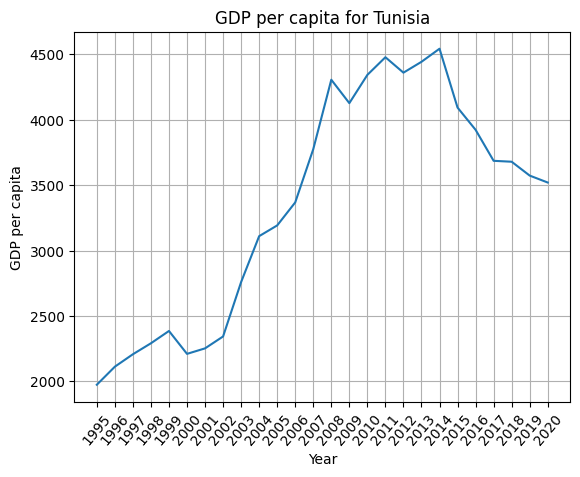

In [11]:
gdp_graph = Graph(gdp, "GDP per capita for Tunisia", "Year", "GDP per capita")
gdp_graph.show()

### 3.2. Tourism Data Analysis

In [12]:
tourism_data = Dataset("data/tourism_arrival.csv")
tourism = tourism_data.to_dataframe(tourism_columns)

In [13]:
tourism.head(5)

,REF_AREA_LABEL,TIME_PERIOD,OBS_VALUE
0,Africa Eastern and Southern,1995,1.158354e+07
1,Africa Western and Central,1995,2.670706e+06
2,Caribbean small states,1995,8.608437e+06
3,Central Electricity Board (CEB),1995,1.886526e+08
4,Early-demographic dividend,1995,1.632028e+08


In [14]:
tourism = tourism[tourism["REF_AREA_LABEL"] == "Tunisia"]

In [15]:
tourism.head()

,REF_AREA_LABEL,TIME_PERIOD,OBS_VALUE
191,Tunisia,1995,4120000.0
404,Tunisia,1996,3885000.0
619,Tunisia,1997,4263000.0
834,Tunisia,1998,4718000.0
1050,Tunisia,1999,4832000.0


In [16]:
# Rename columns
tourism.columns = ["Country Name", "Year", "Value"]

In [31]:
tourism=tourism.reset_index(drop=True)
tourism = tourism.sort_values(by="Year", ascending=True)

In [32]:
tourism.head()

,Country Name,Year,Value
0,Tunisia,1995,4120000.0
1,Tunisia,1996,3885000.0
2,Tunisia,1997,4263000.0
3,Tunisia,1998,4718000.0
4,Tunisia,1999,4832000.0


In [19]:
tourism["Year"].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

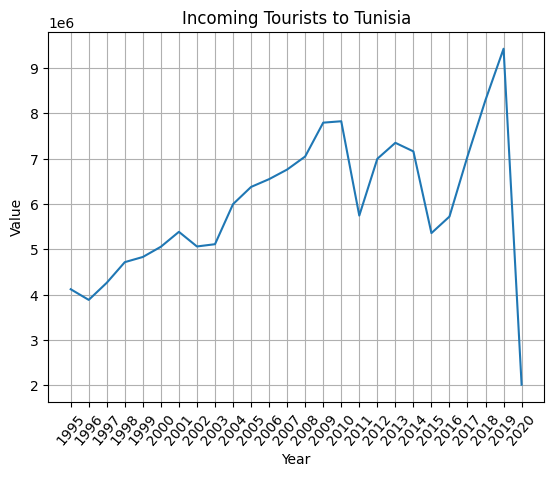

In [20]:
tourism_graph = Graph(tourism, "Incoming Tourists to Tunisia", "Year", "Value")
tourism_graph.show()

## 4. Visual Analysis
### 4.1. Side-by-Side Comparison Graph

In [21]:
gdp.head()

,Country Name,Year,GDP per capita
0,Tunisia,1995,1975.899862
1,Tunisia,1996,2113.587432
2,Tunisia,1997,2208.206243
3,Tunisia,1998,2292.711741
4,Tunisia,1999,2386.589492


In [22]:
tourism.head()

,Country Name,Year,Value
191,Tunisia,1995,4120000.0
404,Tunisia,1996,3885000.0
619,Tunisia,1997,4263000.0
834,Tunisia,1998,4718000.0
1050,Tunisia,1999,4832000.0


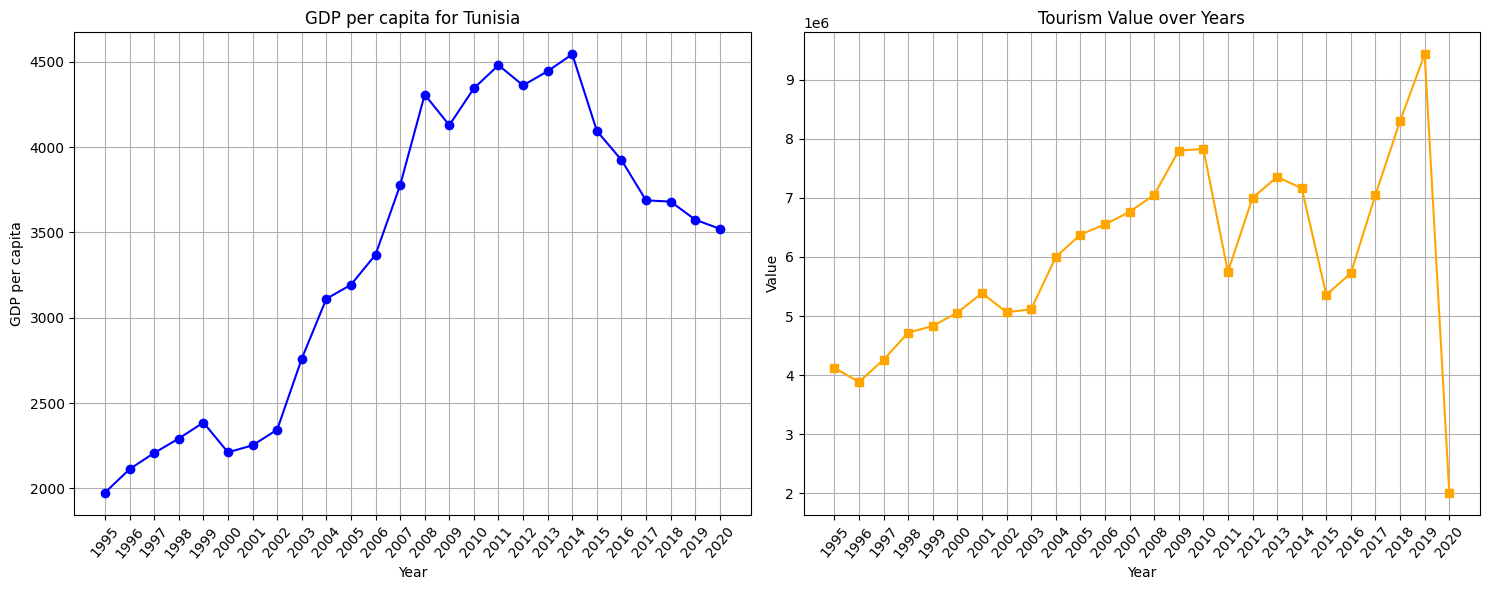

In [23]:
g = MultipleGraph(gdp, tourism, "Year", "Year", "GDP per capita", "Value", "GDP per capita for Tunisia", "Tourism Value over Years")
g.show_side_by_side()

### 4.2. Normalized Data Visualization

In [24]:
# Make sure that 'Year' is of type int in both dataframes
gdp['Year'] = gdp['Year'].astype(int)
tourism['Year'] = tourism['Year'].astype(int)

In [25]:
# Merge GDP and Tourism dataframes
merged = gdp.merge(
    tourism,
    on=['Country Name', 'Year'],
    how='inner'
)

In [26]:
merged = merged.rename(columns={'Value': 'Tourism value'})

In [27]:
merged.head()

,Country Name,Year,GDP per capita,Tourism value
0,Tunisia,1995,1975.899862,4120000.0
1,Tunisia,1996,2113.587432,3885000.0
2,Tunisia,1997,2208.206243,4263000.0
3,Tunisia,1998,2292.711741,4718000.0
4,Tunisia,1999,2386.589492,4832000.0


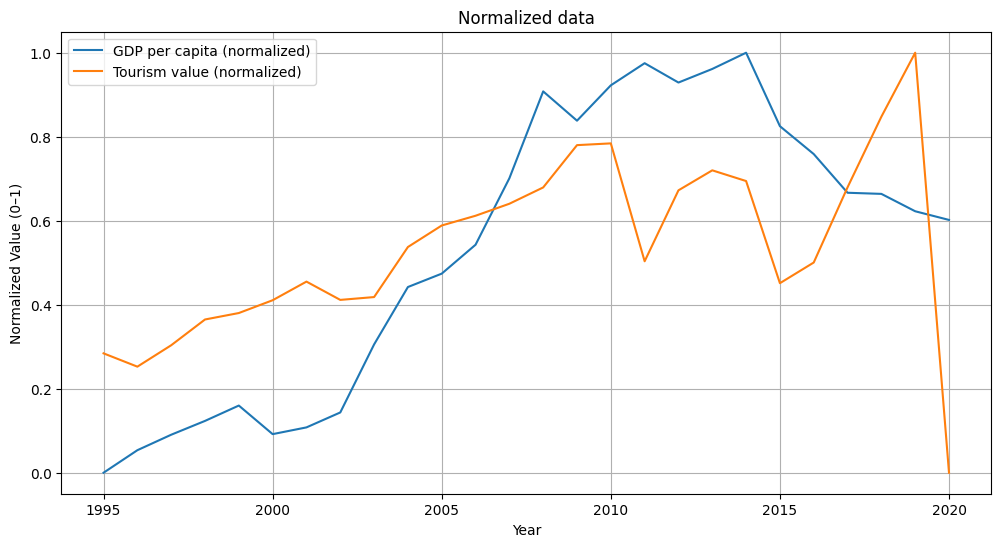

In [33]:
g = NormalizedGraph(merged, "GDP per capita", "Tourism value")
g.show()

## 5. Statistical Analysis

In [34]:
merged.head()

,Country Name,Year,GDP per capita,Tourism value
0,Tunisia,1995,1975.899862,4120000.0
1,Tunisia,1996,2113.587432,3885000.0
2,Tunisia,1997,2208.206243,4263000.0
3,Tunisia,1998,2292.711741,4718000.0
4,Tunisia,1999,2386.589492,4832000.0


## 2) Pearson correlation on year-to-year changes

__Goal: Show that GDP per capita depends on Tourism value because they go up and down together.__

The Pearson correlation coefficient (often called Pearson’s r) is a statistical measure that describes the strength and direction of a linear relationship between two continuous variables. In our case: __GDP per capita__ and __Tourism value__

`Key points`:

- __Range: from –1 to +1:__

  - __+1__ → perfect positive linear relationship

  - __–1__ → perfect negative linear relationship

  - __0__ → no linear relationship

`Interpretation`: Values closer to __±1__ indicate stronger linear associations.

In [35]:
# Pearson correlation
merged[["GDP per capita", "Tourism value"]].corr()

,GDP per capita,Tourism value
GDP per capita,1.000000,0.607127
Tourism value,0.607127,1.000000


In Tunisia, the correlation between GDP per capita and Tourism value is 0.607.  
In applied economics: 0.6+ is considered strong co-movement.

✔ When Tunisia’s tourism value is high → GDP per capita tends to be high  
✔ When tourism is low → GDP per capita tends to be low.

## 3) Spearman correlation
The **Spearman rank correlation coefficient** (Spearman’s ρ or *rho*) measures the **strength and direction of a *monotonic* relationship** between two variables based on their **ranked values** rather than their raw values.

#### Key points:

* **Range:** –1 to +1
* **Purpose:** Captures how well the relationship between two variables can be described by a **monotonic** (consistently increasing or decreasing) pattern.
* **Works with:**
  * Ranked (ordinal) data
  * Nonlinear but monotonic relationships
  * Data with outliers (more robust than Pearson)
* **When used:**
  * When normality or linearity assumptions are violated
  * When data contain outliers or are ordinal

In [36]:
merged[['GDP per capita', 'Tourism value']].corr(method='spearman')

,GDP per capita,Tourism value
GDP per capita,1.000000,0.712821
Tourism value,0.712821,1.000000


1. Spearman correlation: 0.71 → Strong monotonic co-movement

A Spearman correlation of 0.71 means:

✔ When tourism value is higher, GDP per capita also tends to be higher  
✔ When tourism value is lower, GDP per capita also tends to be lower  
✔ This relationship is strong, but not necessarily linear  
✔ It captures overall trend similarity, not year-to-year movement  

This is excellent evidence that the _*'GDP per capita'*_  and _*T'ourism value'*_ follow a similar long-term pattern.

Conclusion:
Over the years, high Tunisia tourism values tend to have high GDP per capita.